In [411]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.impute import KNNImputer
import numpy as np

world_data = pd.read_csv("world_data.csv")
top_languages = pd.read_csv("top_languages.csv")

In [412]:
# https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [413]:
# Removing Unwanted Columns
world_data.drop(['Abbreviation'], axis=1, inplace=True)
world_data.drop(['Calling Code'], axis=1, inplace=True)
world_data.drop(['Capital/Major City'], axis=1, inplace=True)
world_data.drop(['Currency-Code'], axis=1, inplace=True)
world_data.drop(['Latitude'], axis=1, inplace=True)
world_data.drop(['Longitude'], axis=1, inplace=True)
world_data.drop(['Armed Forces size'], axis=1, inplace=True)
world_data.drop(['Largest city'], axis=1, inplace=True)

# world_data.drop(['Land Area(Km2)'], axis=1, inplace=True)
# world_data.drop(['Birth Rate'], axis=1, inplace=True)

In [414]:
# Dataset after removing all unwanted columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230",32.49,"8,672",149.9,2.30%,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748",11.78,"4,536",119.05,1.40%,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741",24.28,"150,006",151.36,2.00%,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,7.20,469,NaN,NaN,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700",40.73,"34,693",261.73,17.10%,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"


In [415]:
# Checking data type of each column
for column_name, data_type in world_data.dtypes.items():
    print(f"Column: {column_name}, Data Type: {data_type}")

Column: Country, Data Type: object
Column: Density
(P/Km2), Data Type: object
Column: Agricultural Land( %), Data Type: object
Column: Land Area(Km2), Data Type: object
Column: Birth Rate, Data Type: float64
Column: Co2-Emissions, Data Type: object
Column: CPI, Data Type: object
Column: CPI Change (%), Data Type: object
Column: Fertility Rate, Data Type: float64
Column: Forested Area (%), Data Type: object
Column: Gasoline Price, Data Type: object
Column: GDP, Data Type: object
Column: Gross primary education enrollment (%), Data Type: object
Column: Gross tertiary education enrollment (%), Data Type: object
Column: Infant mortality, Data Type: float64
Column: Life expectancy, Data Type: float64
Column: Maternal mortality ratio, Data Type: float64
Column: Minimum wage, Data Type: object
Column: Official language, Data Type: object
Column: Out of pocket health expenditure, Data Type: object
Column: Physicians per thousand, Data Type: float64
Column: Population, Data Type: object
Column:

In [416]:
# Converting strings to integers and floats
def replace_commas(x):
    return x.replace(',', '') if isinstance(x, str) else x

def replace_percentage(x):
    return x.replace('%', '') if isinstance(x, str) else x

def replace_dollar(x):
    return x.replace('$', '') if isinstance(x, str) else x

def round_down(x):
    return x * 0.01

world_data['Density\n(P/Km2)'] = world_data['Density\n(P/Km2)'].apply(replace_commas).astype(float)
world_data['Agricultural Land( %)'] = world_data['Agricultural Land( %)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Land Area(Km2)'] = world_data['Land Area(Km2)'].apply(replace_commas).astype(float)
world_data['Co2-Emissions'] = world_data['Co2-Emissions'].apply(replace_commas).astype(float)
world_data['CPI'] = world_data['CPI'].apply(replace_commas).astype(float)
world_data['CPI Change (%)'] = world_data['CPI Change (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Forested Area (%)'] = world_data['Forested Area (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Gasoline Price'] = world_data['Gasoline Price'].apply(replace_dollar).astype(float)
world_data['GDP'] = world_data['GDP'].apply(replace_dollar).apply(replace_commas).astype(float)
world_data['Gross primary education enrollment (%)'] = world_data['Gross primary education enrollment (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Gross tertiary education enrollment (%)'] = world_data['Gross tertiary education enrollment (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Minimum wage'] = world_data['Minimum wage'].apply(replace_dollar).astype(float)
world_data['Out of pocket health expenditure'] = world_data['Out of pocket health expenditure'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Population'] = world_data['Population'].apply(replace_commas).astype(float)
world_data['Population: Labor force participation (%)'] = world_data['Population: Labor force participation (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Tax revenue (%)'] = world_data['Tax revenue (%)'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Total tax rate'] = world_data['Total tax rate'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Unemployment rate'] = world_data['Unemployment rate'].apply(replace_percentage).astype(float).apply(round_down)
world_data['Urban_population'] = world_data['Urban_population'].apply(replace_commas).astype(float)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data.head())

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.0,0.581,652230.0,32.49,8672.0,149.90,0.023,4.47,0.021,0.70,1.910135e+10,1.040,0.097,47.9,64.5,638.0,0.43,Pashto,0.784,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0
1,Albania,105.0,0.431,28748.0,11.78,4536.0,119.05,0.014,1.62,0.281,1.36,1.527808e+10,1.070,0.550,7.8,78.5,15.0,1.12,Albanian,0.569,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0
2,Algeria,18.0,0.174,2381741.0,24.28,150006.0,151.36,0.020,3.02,0.008,0.28,1.699882e+11,1.099,0.514,20.1,76.7,112.0,0.95,Arabic,0.281,1.72,43053054.0,0.412,0.372,0.661,0.1170,31510100.0
3,Andorra,164.0,0.400,468.0,7.20,469.0,NaN,NaN,1.27,0.340,1.51,3.154058e+09,1.064,NaN,2.7,NaN,NaN,6.63,Catalan,0.364,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0
4,Angola,26.0,0.475,1246700.0,40.73,34693.0,261.73,0.171,5.52,0.463,0.97,9.463542e+10,1.135,0.093,51.6,60.8,241.0,0.71,Portuguese,0.334,0.21,31825295.0,0.775,0.092,0.491,0.0689,21061025.0


In [417]:
threshold = 9

while threshold >= 2:
    rows_with_missing_values = world_data[world_data.isnull().any(axis=1)]
    missing_values_per_row = rows_with_missing_values.isnull().sum(axis=1)
    rows_with_several_missing_values = rows_with_missing_values[missing_values_per_row >= threshold]
    world_data = world_data.drop(rows_with_several_missing_values.index)
    threshold = threshold - 1

print(len(world_data))

162


In [418]:
null_counts = world_data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

CPI                                         1
Gasoline Price                              3
Gross primary education enrollment (%)      1
Gross tertiary education enrollment (%)     1
Minimum wage                               25
Official language                           4
Tax revenue (%)                             9
dtype: int64


In [419]:
# Substitute values for missing CPI
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['CPI'].isnull()])

imputer = KNNImputer()

world_data['CPI'] = imputer.fit_transform(world_data[['CPI']])
world_data.loc[15, 'CPI'] = round(world_data.loc[15, 'CPI'], 2)
print(world_data.loc[15, 'CPI'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
15,Belarus,47.0,0.42,207600.0,9.9,58280.0,NaN,0.056,1.45,0.426,0.6,6.308046e+10,1.005,0.874,2.6,74.2,2.0,1.49,Russian,0.345,5.19,9466856.0,0.641,0.147,0.533,0.0459,7482982.0


170.18


In [420]:
# Substitute values for missing Gasoline Prices
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Gasoline Price'].isnull()])

imputer = KNNImputer()

world_data['Gasoline Price'] = imputer.fit_transform(world_data[['Gasoline Price']])
world_data['Gasoline Price'] = world_data['Gasoline Price'].round(2)
print(world_data.loc[53, 'Gasoline Price'])
print(world_data.loc[70, 'Gasoline Price'])
print(world_data.loc[147, 'Gasoline Price'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
53,Equatorial Guinea,50.0,0.101,28051.0,33.24,5655.0,124.35,0.012,4.51,0.555,NaN,1.102677e+10,0.618,0.019,62.6,58.4,301.0,1.05,Spanish,0.720,0.40,1355986.0,0.620,0.061,0.794,0.0643,984812.0
70,Guinea-Bissau,70.0,0.580,36125.0,35.13,293.0,111.65,0.014,4.48,0.698,NaN,1.340389e+09,1.187,0.026,54.0,58.0,667.0,0.16,Portuguese,0.372,0.13,1920922.0,0.720,0.103,0.455,0.0247,840922.0
147,Saint Vincent and the Grenadines,284.0,0.256,389.0,14.24,220.0,109.67,0.023,1.89,0.692,NaN,8.253852e+08,1.134,0.237,14.8,72.4,68.0,1.16,English,0.214,0.66,100455.0,0.659,0.254,0.370,0.1888,58185.0


0.99
0.99
0.99


In [421]:
# Substitute values for missing Gross primary education enrollment (%)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Gross primary education enrollment (%)'].isnull()])

imputer = KNNImputer()

world_data['Gross primary education enrollment (%)'] = imputer.fit_transform(world_data[['Gross primary education enrollment (%)']])
world_data['Gross primary education enrollment (%)'] = world_data['Gross primary education enrollment (%)'].round(2)

print(world_data.loc[21, 'Gross primary education enrollment (%)'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
21,Bosnia and Herzegovina,64.0,0.431,51197.0,8.11,21848.0,104.9,0.006,1.27,0.427,1.05,2.004785e+10,NaN,0.233,5.0,77.3,10.0,1.04,Bosnian,0.286,2.16,3301000.0,0.464,0.204,0.237,0.1842,1605144.0


1.03


In [422]:
# Substitute values for missing Gross tertiary education enrollment (%)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Gross tertiary education enrollment (%)'].isnull()])

imputer = KNNImputer()

world_data['Gross tertiary education enrollment (%)'] = imputer.fit_transform(world_data[['Gross tertiary education enrollment (%)']])
world_data['Gross tertiary education enrollment (%)'] = world_data['Gross tertiary education enrollment (%)'].round(2)

print(world_data.loc[20, 'Gross tertiary education enrollment (%)'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
20,Bolivia,11.0,0.348,1098581.0,21.75,21606.0,148.32,0.018,2.73,0.503,0.71,4.089532e+10,0.98,NaN,21.8,71.2,155.0,1.36,Spanish,0.259,1.59,11513100.0,0.718,0.17,0.837,0.035,8033035.0


0.4


In [423]:
# Substitute values for missing Minimum wage
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Minimum wage'].isnull()])

imputer = KNNImputer()

world_data['Minimum wage'] = imputer.fit_transform(world_data[['Minimum wage']])
world_data['Minimum wage'] = world_data['Minimum wage'].round(2)


,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
9,Austria,109.0,0.324,83871.0,9.70,61448.0,118.06,0.015,1.47,0.469,1.20,4.463147e+11,1.03,0.85,2.9,81.6,5.0,NaN,German,0.179,5.17,8877067.0,0.607,0.254,0.514,0.0467,5194416.0
12,Bahrain,2239.0,0.111,765.0,13.99,31694.0,117.59,0.021,1.99,0.008,0.43,3.857407e+10,0.99,0.50,6.1,77.2,14.0,NaN,Arabic,0.251,0.93,1501635.0,0.734,0.042,0.138,0.0071,1467109.0
27,Burundi,463.0,0.792,27830.0,39.01,495.0,182.11,-0.007,5.41,0.109,1.21,3.012335e+09,1.21,0.06,41.0,61.2,548.0,NaN,Kirundi,0.191,0.10,11530580.0,0.792,0.136,0.412,0.0143,1541177.0
30,Cambodia,95.0,0.309,181035.0,22.46,9919.0,127.63,0.025,2.50,0.529,0.90,2.708939e+10,1.07,0.14,24.0,69.6,160.0,NaN,Khmer language,0.594,0.17,16486542.0,0.823,0.171,0.231,0.0068,3924621.0
43,Cyprus,131.0,0.122,9251.0,10.46,6626.0,102.51,0.003,1.33,0.187,1.23,2.456465e+10,0.99,0.76,1.9,80.8,6.0,NaN,Greek,0.439,1.95,1198575.0,0.631,0.245,0.224,0.0727,800708.0
46,Denmark,137.0,0.620,43094.0,10.60,31786.0,110.35,0.008,1.73,0.147,1.55,3.480780e+11,1.01,0.81,3.6,81.0,4.0,NaN,Danish,0.137,4.01,5818553.0,0.622,0.324,0.238,0.0491,5119978.0
51,Egypt,103.0,0.038,1001450.0,26.38,238560.0,288.57,0.092,3.33,0.001,0.40,3.031751e+11,1.06,0.35,18.1,71.8,37.0,NaN,Modern Standard Arabic,0.620,0.45,100388073.0,0.464,0.125,0.444,0.1076,42895824.0
57,Ethiopia,115.0,0.363,1104300.0,32.34,14870.0,143.86,0.158,4.25,0.125,0.75,9.610766e+10,1.01,0.08,39.1,66.2,401.0,NaN,Amharic,0.378,0.08,112078730.0,0.796,0.075,0.377,0.0208,23788710.0
59,Finland,18.0,0.075,338145.0,8.60,45871.0,112.33,0.010,1.41,0.731,1.45,2.687612e+11,1.00,0.88,1.4,81.7,3.0,NaN,Swedish,0.199,3.81,5520314.0,0.591,0.208,0.366,0.0659,4716888.0
69,Guinea,53.0,0.590,245857.0,36.36,2996.0,262.95,0.095,4.70,0.258,0.90,1.359028e+10,0.92,0.12,64.9,61.2,576.0,NaN,French,0.545,0.08,12771246.0,0.615,0.108,0.693,0.0430,4661505.0


In [424]:
# Substitute values for missing Official language
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Official language'].isnull()])

world_data.loc[8, 'Official language'] = 'English'
world_data.loc[85, 'Official language'] = 'Japanese'
world_data.loc[110, 'Official language'] = 'Spanish'
world_data.loc[186, 'Official language'] = 'English'

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
8,Australia,3.0,0.482,7741220.0,12.6,375908.0,119.80,0.016,1.74,0.163,0.93,1.392681e+12,1.00,1.13,3.1,82.7,6.0,13.59,NaN,0.196,3.68,25766605.0,0.655,0.230,0.474,0.0527,21844756.0
85,Japan,347.0,0.123,377944.0,7.4,1135886.0,105.48,0.005,1.42,0.685,1.06,5.081770e+12,0.99,0.63,1.8,84.2,5.0,6.77,NaN,0.131,2.41,126226568.0,0.617,0.119,0.467,0.0229,115782416.0
110,Mexico,66.0,0.546,1964375.0,17.6,486406.0,141.54,0.036,2.13,0.339,0.73,1.258287e+12,1.06,0.40,11.0,75.0,33.0,0.49,NaN,0.414,2.38,126014024.0,0.607,0.131,0.551,0.0342,102626859.0
186,United States,36.0,0.444,9833517.0,11.6,5006302.0,117.24,0.075,1.73,0.339,0.71,2.142770e+13,1.02,0.88,5.6,78.5,19.0,7.25,NaN,0.111,2.61,328239523.0,0.620,0.096,0.366,0.1470,270663028.0


In [425]:
# Substitute values for missing Tax revenue (%)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):      
    display(world_data[world_data['Tax revenue (%)'].isnull()])

imputer = KNNImputer()

world_data['Tax revenue (%)'] = imputer.fit_transform(world_data[['Tax revenue (%)']])
world_data['Tax revenue (%)'] = world_data['Tax revenue (%)'].round(2)

print(world_data.loc[34, 'Tax revenue (%)'])
print(world_data.loc[50, 'Tax revenue (%)'])
print(world_data.loc[71, 'Tax revenue (%)'])

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
34,Chad,13.0,0.397,1284000.0,42.17,1016.0,117.70,-0.010,5.75,0.038,0.78,1.131495e+10,0.87,0.03,71.4,54.0,1140.0,0.60,French,0.564,0.04,15946876.0,0.707,NaN,0.635,0.0189,3712273.0
50,Ecuador,71.0,0.222,283561.0,19.72,41155.0,124.14,0.003,2.43,0.502,0.61,1.074357e+11,1.03,0.45,12.2,76.8,59.0,2.46,Spanish,0.437,2.04,17373662.0,0.680,NaN,0.344,0.0397,11116711.0
71,Guyana,4.0,0.086,214969.0,19.97,2384.0,116.19,0.021,2.46,0.839,0.90,4.280444e+09,0.98,0.12,25.1,69.8,169.0,0.98,English,0.405,0.80,782766.0,0.562,NaN,0.306,0.1185,208912.0
72,Haiti,414.0,0.668,27750.0,24.35,2978.0,179.29,0.125,2.94,0.035,0.81,8.498982e+09,1.14,0.01,49.5,63.7,480.0,0.25,French,0.363,0.23,11263077.0,0.672,NaN,0.427,0.1378,6328948.0
97,Libya,4.0,0.087,1759540.0,18.83,50564.0,125.71,0.026,2.24,0.001,0.11,5.207625e+10,1.09,0.60,10.2,72.7,72.0,1.88,Arabic,0.367,2.09,6777452.0,0.497,NaN,0.326,0.1856,5448597.0
108,Mauritania,5.0,0.385,1030700.0,33.69,2739.0,135.02,0.023,4.56,0.002,1.13,7.593752e+09,1.00,0.05,51.5,64.7,766.0,0.53,Arabic,0.482,0.19,4525696.0,0.459,NaN,0.670,0.0955,2466821.0
115,Montenegro,47.0,0.190,13812.0,11.73,2017.0,116.32,0.026,1.75,0.615,1.16,5.494737e+09,1.00,0.56,2.3,76.8,6.0,1.23,Montenegrin language,0.318,2.76,622137.0,0.544,NaN,0.222,0.1488,417765.0
134,Panama,58.0,0.304,75420.0,18.98,10715.0,122.07,-0.004,2.46,0.619,0.74,6.680080e+10,0.94,0.48,13.1,78.3,52.0,1.53,Spanish,0.305,1.57,4246439.0,0.666,NaN,0.372,0.0390,2890084.0
190,Venezuela,32.0,0.245,912050.0,17.88,164175.0,2740.27,2.549,2.27,0.527,0.00,4.823593e+11,0.97,0.79,21.4,72.1,125.0,0.01,Spanish,0.458,1.92,28515829.0,0.597,NaN,0.733,0.0880,25162368.0


0.16
0.16
0.16


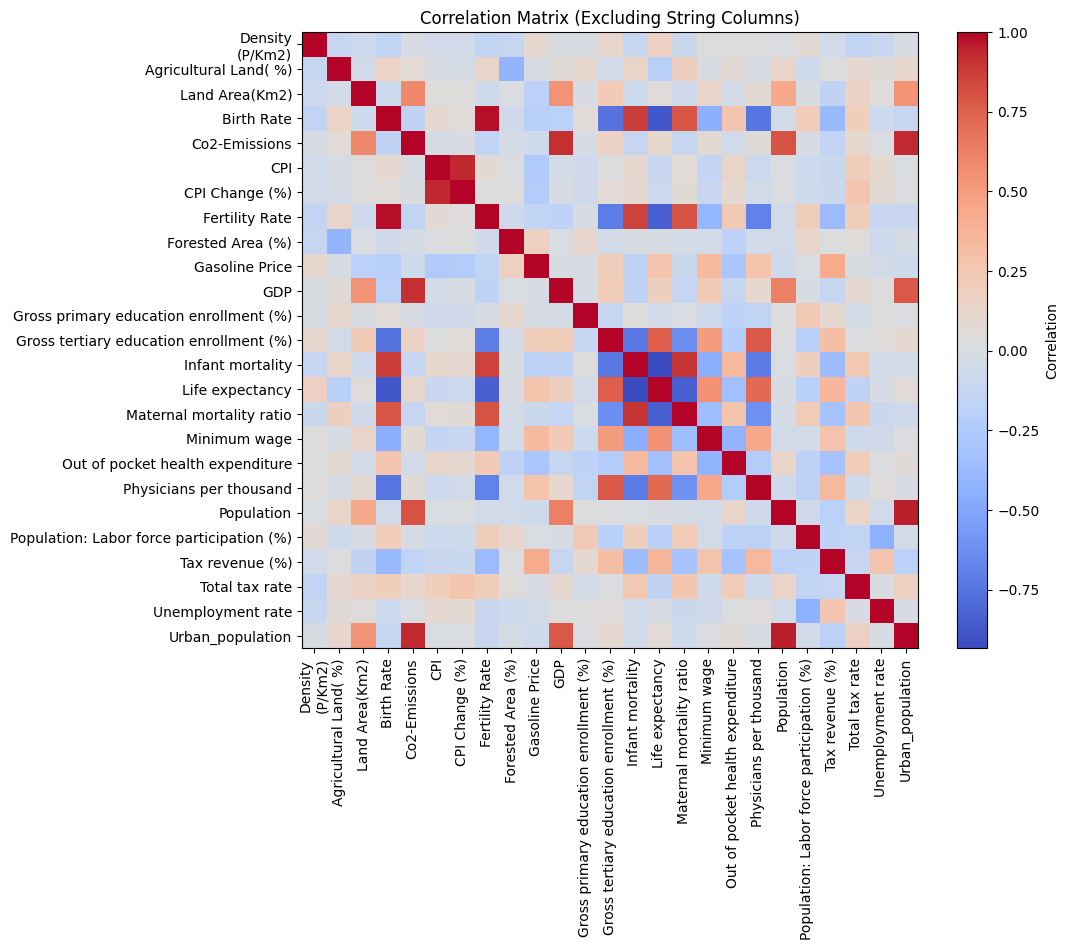


Variables with high multicollinearity:
['GDP', 'CPI Change (%)', 'Life expectancy', 'Infant mortality', 'Population', 'Birth Rate', 'Gross tertiary education enrollment (%)', 'Fertility Rate', 'CPI', 'Maternal mortality ratio', 'Urban_population', 'Co2-Emissions', 'Physicians per thousand']


In [426]:
def get_corr_matrix():
    numeric_columns = world_data.select_dtypes(include=['number'])
    correlation_matrix = numeric_columns.corr()

    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Correlation')
    plt.title('Correlation Matrix (Excluding String Columns)')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

    highly_correlated = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
    multicollinear_variables = set()
    for col in correlation_matrix.columns:
        multicollinear_variables.update(set(correlation_matrix.index[highly_correlated[col]]))
    multicollinear_variables = list(multicollinear_variables)

    print("\nVariables with high multicollinearity:")
    print(multicollinear_variables)

get_corr_matrix()

In [427]:
print("Life expectancy vs Birth rate correlation:", world_data['Life expectancy'].corr(world_data['Birth Rate']))
print("Life expectancy vs Fertility rate correlation:", world_data['Life expectancy'].corr(world_data['Fertility Rate']))
print("Life expectancy vs Infant mortality correlation:", world_data['Life expectancy'].corr(world_data['Infant mortality']))
print("Life expectancy vs Maternal mortality ratio correlation:", world_data['Life expectancy'].corr(world_data['Maternal mortality ratio']))
print("Life expectancy vs Gross tertiary education enrollment (%) correlation:", world_data['Life expectancy'].corr(world_data['Gross tertiary education enrollment (%)']))
print("Life expectancy vs Physicians per thousand correlation:", world_data['Life expectancy'].corr(world_data['Physicians per thousand']))


Life expectancy vs Birth rate correlation: -0.8783627506459828
Life expectancy vs Fertility rate correlation: -0.8506128647352631
Life expectancy vs Infant mortality correlation: -0.9340532269063946
Life expectancy vs Maternal mortality ratio correlation: -0.8474827435596342
Life expectancy vs Gross tertiary education enrollment (%) correlation: 0.7615525570907443
Life expectancy vs Physicians per thousand correlation: 0.7155767128088059


In [428]:
print("Physicians per thousand vs Gross tertiary education enrollment (%) correlation:", world_data['Physicians per thousand'].corr(world_data['Gross tertiary education enrollment (%)']))

Physicians per thousand vs Gross tertiary education enrollment (%) correlation: 0.7875868110132871


In [429]:
print("GDP vs CPI Change (%) correlation:", world_data['GDP'].corr(world_data['CPI Change (%)']))
print("GDP vs CPI correlation:", world_data['GDP'].corr(world_data['CPI']))
print("GDP vs Urban_population correlation:", world_data['GDP'].corr(world_data['Urban_population']))
print("GDP vs Co2-Emissions correlation:", world_data['GDP'].corr(world_data['Co2-Emissions']))
print("GDP vs Population correlation:", world_data['GDP'].corr(world_data['Population']))

GDP vs CPI Change (%) correlation: -0.006362311167748869
GDP vs CPI correlation: -0.02799995507103393
GDP vs Urban_population correlation: 0.7824471424502627
GDP vs Co2-Emissions correlation: 0.9163128217011677
GDP vs Population correlation: 0.6288286231178897


In [430]:
print("CPI vs CPI Change (%) correlation:", world_data['CPI'].corr(world_data['CPI Change (%)']))
print("CPI vs Urban_population correlation:", world_data['CPI'].corr(world_data['Urban_population']))
print("CPI vs Co2-Emissions correlation:", world_data['CPI'].corr(world_data['Co2-Emissions']))
print("CPI vs Population correlation:", world_data['CPI'].corr(world_data['Population']))

CPI vs CPI Change (%) correlation: 0.9364256250248332
CPI vs Urban_population correlation: 0.008055244629328518
CPI vs Co2-Emissions correlation: -0.011339867648857908
CPI vs Population correlation: 0.008869958506319782


In [431]:
print("CPI Change (%) vs Urban_population correlation:", world_data['CPI Change (%)'].corr(world_data['Urban_population']))
print("CPI Change (%) vs Co2-Emissions correlation:", world_data['CPI Change (%)'].corr(world_data['Co2-Emissions']))
print("CPI Change (%) vs Population correlation:", world_data['CPI Change (%)'].corr(world_data['Population']))

CPI Change (%) vs Urban_population correlation: 0.017123785394464748
CPI Change (%) vs Co2-Emissions correlation: 0.0020878150848206724
CPI Change (%) vs Population correlation: 0.011998830840981965


In [432]:
print("Urban_population vs Co2-Emissions correlation:", world_data['Urban_population'].corr(world_data['Co2-Emissions']))
print("Urban_population vs Population correlation:", world_data['Urban_population'].corr(world_data['Population']))

Urban_population vs Co2-Emissions correlation: 0.9260742793224854
Urban_population vs Population correlation: 0.9537396721692657


In [433]:
# Remove columns with high colinearity
world_data.drop(columns=['Birth Rate'], inplace=True)
world_data.drop(columns=['Fertility Rate'], inplace=True)
world_data.drop(columns=['Infant mortality'], inplace=True)
world_data.drop(columns=['Maternal mortality ratio'], inplace=True)
world_data.drop(columns=['Co2-Emissions'], inplace=True)
world_data.drop(columns=['CPI Change (%)'], inplace=True)
world_data.drop(columns=['Urban_population'], inplace=True)
world_data.drop(columns=['Gross tertiary education enrollment (%)'], inplace=True)

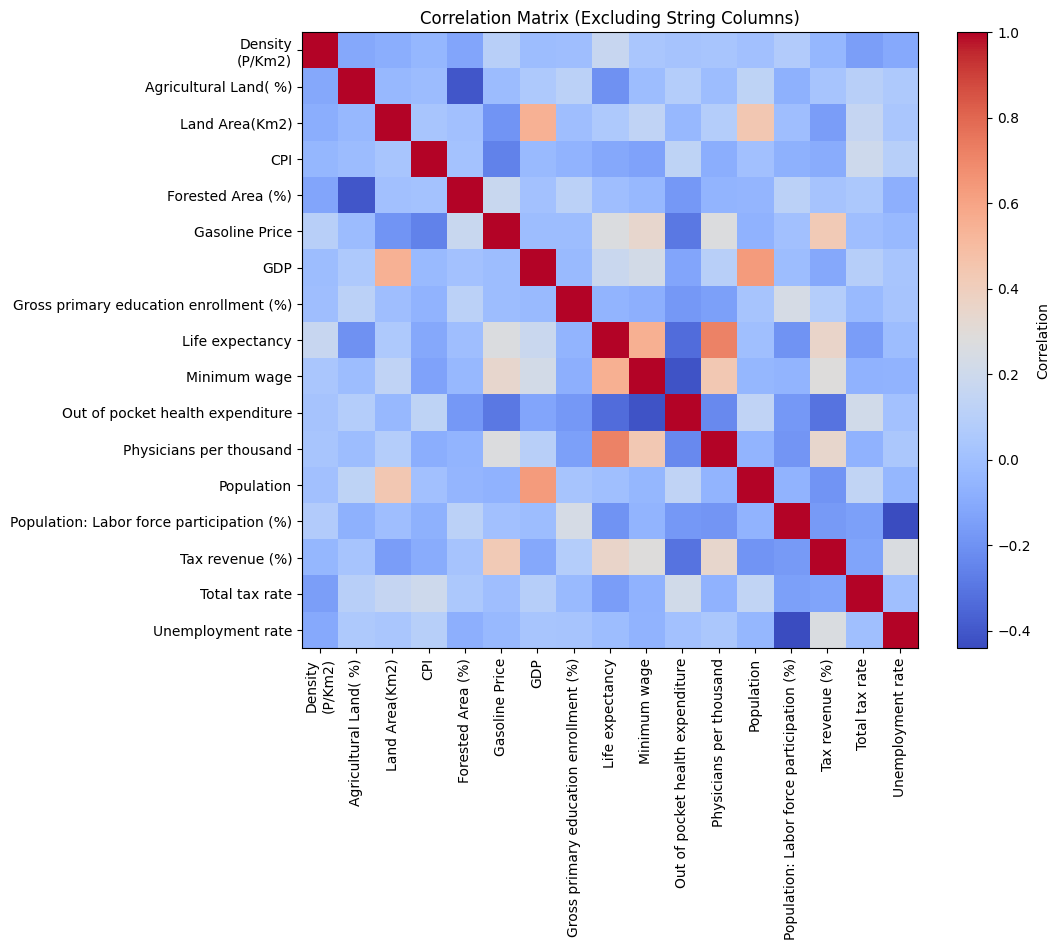


Variables with high multicollinearity:
['Physicians per thousand', 'Life expectancy']


In [434]:
get_corr_matrix()